In [2]:
import sys
sys.path.append('../')

import regex as re
import pandas as pd
from src.utils.preprocessing import (load_data,
                                    save_data,
                                    build_combined_discharge,
                                    get_bhc_input,
                                    extract_clean_inputs,
                                    remove_unecessary_tokens)

from src.utils.token_count import get_token_list, get_token_count, plot_token_count
from tqdm import tqdm
tqdm.pandas()

%load_ext autoreload
%autoreload 2

In [3]:
data_path = '../data/'

In [4]:
train_discharge = load_data(data_path + 'train/discharge.csv.gz')
train_targets = load_data(data_path + 'train/discharge_target.csv.gz')
train_combined_discharge = build_combined_discharge(train_discharge, train_targets)

In [5]:
valid_discharge = load_data(data_path + 'valid/discharge.csv.gz')
valid_targets = load_data(data_path + 'valid/discharge_target.csv.gz') 
valid_combined_discharge = build_combined_discharge(valid_discharge, valid_targets)

In [6]:
new_train_combined_discharge = pd.concat([train_combined_discharge, valid_combined_discharge], axis=0).reset_index(drop=True)

In [7]:
print(len(train_combined_discharge))
print(len(valid_combined_discharge))
print(len(new_train_combined_discharge))

68785
14719
83504


**Stage1: First cleaning by meaningful extraction**
i.e. keep and organize relevent sections without looking to much in details

In [54]:
clean1_bhc_input = extract_clean_inputs(new_train_combined_discharge,
                        features_to_include=[
                                'sex',
                                'allergies',
                                'chief_complaint',
                                'major_surgical_procedures',
                                'history_of_present_illness',
                                'past_medical_history',
                                'social_history',
                                'family_history',
                                'physical_exam',
                                'pertinent_results',
                            ])

  0%|          | 0/83504 [00:00<?, ?it/s]

100%|██████████| 83504/83504 [00:56<00:00, 1480.17it/s]


In [60]:
print(clean1_bhc_input[4])

Sex: 
F
 
Allergies: 
No Known Allergies / Adverse Drug Reactions
 
Chief Complaint: 
Shortness of breath

Major Surgical or Invasive Procedure: 
None

History of Present Illness: 
___ yo woman with h/o hypertension, hyperlipidemia, diabetes 
mellitus on insulin therapy, h/o cerebellar-medullary stroke in 
___, CKD stage III-IV presenting with fatigue and dyspnea on 
exertion (DOE) for a few weeks, markedly worse this morning. 
Over the past few weeks, the patient noted DOE and shortness of 
breath (SOB) even at rest. She has also felt more tired than 
usual. She notes no respiratory issues like this before. She 
cannot walk up stair due to DOE, and feels SOB after only a 
short distance. She is unsure how long the episodes last, but 
states that her breathing improves with albuterol which she gets 
from her husband. She had a bad cough around a month ago, but 
denies any recent fevers, chills, or night sweats. No chest 
pain, nausea, or dizziness.

Past Medical History: 
1. CAD RISK F

In [35]:
new_train_combined_discharge['bhc_token_count'] = new_train_combined_discharge['brief_hospital_course'].progress_apply(get_token_count)
new_train_combined_discharge['di_token_count'] = new_train_combined_discharge['discharge_instructions'].progress_apply(get_token_count)

100%|██████████| 83504/83504 [01:05<00:00, 1271.70it/s]


In [8]:
new_train_combined_discharge.head(-5)

,hadm_id,text,discharge_instructions,brief_hospital_course
0,22841357,\nName: ___ Unit No: _...,"Dear ___,\n\n___ was a pleasure to take care o...","___ with HIV on HAART, HCV cirrhosis with asci..."
1,22927623,\nName: ___ Unit No: ___\n...,"Dear Ms. ___,\n\nYou were hospitalized at ___....",Ms. ___ is a ___ with history of GERD who pres...
2,21738619,\nName: ___ Unit No: ___...,"Dear ___, \n\n___ were seen in the ED for ongo...",___ Female with PMH significant for depression...
3,25849114,\nName: ___ Unit No: ___...,"Dear Ms. ___,\nIt was a pleasure taking part i...",Ms. ___ is a ___ with metastatic cancer of unk...
4,29654838,\nName: ___ Unit No: ___\n \nAdmi...,"Dear Ms. ___, \n\nYou were admitted for shortn...","___ woman with h/o hypertension, hypelipidemia..."
...,...,...,...,...
83494,28863685,\nName: ___ Unit No: __...,"Dear Mr. ___,\n\nYou were admitted to ___ beca...",Mr. ___ is a ___ year old gentleman with advan...
83495,23271921,\nName: ___ Unit No: __...,You were admitted after evaluation for symptom...,The patient had a course postoperatively that ...
83496,25278362,\nName: ___ Unit No: ...,Dr. ___ was a pleasure taking care of you at _...,___ y/o M with recent diagnosis of Hodgkin's L...
83497,23014132,\nName: ___ Unit No: ___\n \n...,"Dear Mr. ___,\n\nWHY WERE YOU ADMITTED TO THE ...","___ y/o M with history of bladder cancer, lymp..."


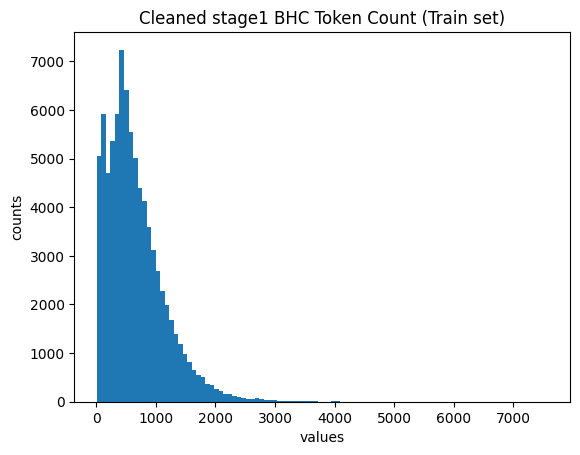

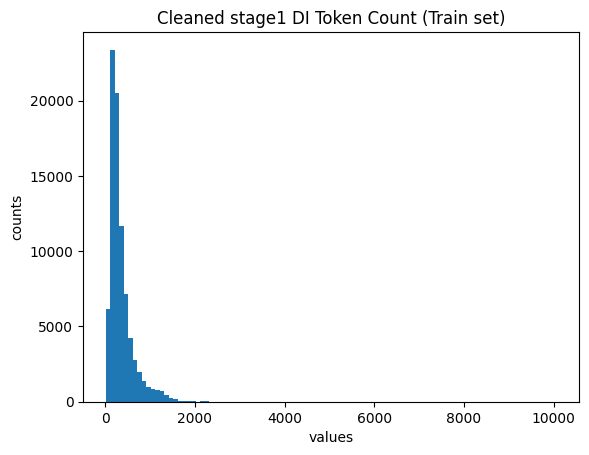

In [13]:
plot_token_count(new_train_combined_discharge['bhc_token_count'], 'Cleaned stage1 BHC Token Count (Train set)')
plot_token_count(new_train_combined_discharge['di_token_count'], 'Cleaned stage1 DI Token Count (Train set)')

In [11]:
clean1_bhc_input.head()

0    Sex: \nF\n \nAllergies: \nPercocet\n \nChief C...
1    Sex: \nF\n \nAllergies: \nomeprazole\n \nChief...
2    Sex: \nF\n \nAllergies: \nSulfa (Sulfonamide A...
3    Sex: \nF\n \nAllergies: \nSulfa (Sulfonamide A...
4    Sex: \nF\n \nAllergies: \nNo Known Allergies /...
Name: text, dtype: object

In [15]:
clean_1_bhc_input_token_count = clean1_bhc_input.progress_apply(get_token_count)
plot_token_count(clean_1_bhc_input_token_count,
                 'Cleaned stage1 BHC Input Token Count (Train set)')
plot_token_count(clean_1_bhc_input_token_count + new_train_combined_discharge['bhc_token_count'] ,
                 'Cleaned stage1 BHC Input+Output Token Count (Train set)')

**Stage2 :Removing some not-such-important sections**
- Remove `social_history` and `family_history`

In [9]:
clean2_bhc_input = extract_clean_inputs(new_train_combined_discharge,
                        features_to_include=[
                                'sex',
                                'allergies',
                                'chief_complaint',
                                'major_surgical_procedures',
                                'history_of_present_illness',
                                'past_medical_history',
                                #'social_history',
                                #'family_history',
                                'physical_exam',
                                'pertinent_results',
                            ])

  0%|          | 0/83504 [00:00<?, ?it/s]

100%|██████████| 83504/83504 [00:52<00:00, 1585.45it/s]


In [55]:
print(clean2_bhc_input[4])

Sex: 
F
 
Allergies: 
No Known Allergies / Adverse Drug Reactions
 
Chief Complaint: 
Shortness of breath

Major Surgical or Invasive Procedure: 
None

History of Present Illness: 
___ yo woman with h/o hypertension, hyperlipidemia, diabetes 
mellitus on insulin therapy, h/o cerebellar-medullary stroke in 
___, CKD stage III-IV presenting with fatigue and dyspnea on 
exertion (DOE) for a few weeks, markedly worse this morning. 
Over the past few weeks, the patient noted DOE and shortness of 
breath (SOB) even at rest. She has also felt more tired than 
usual. She notes no respiratory issues like this before. She 
cannot walk up stair due to DOE, and feels SOB after only a 
short distance. She is unsure how long the episodes last, but 
states that her breathing improves with albuterol which she gets 
from her husband. She had a bad cough around a month ago, but 
denies any recent fevers, chills, or night sweats. No chest 
pain, nausea, or dizziness.

Past Medical History: 
1. CAD RISK F

In [15]:
# add the clean2_bhc_input to the new_train_combined_discharge as a new column
new_train_combined_discharge['input_of_bhc'] = clean2_bhc_input
new_train_combined_discharge['bhc_token_count'] = new_train_combined_discharge['brief_hospital_course'].progress_apply(get_token_count)
new_train_combined_discharge['di_token_count'] = new_train_combined_discharge['discharge_instructions'].progress_apply(get_token_count)
new_train_combined_discharge['input_of_bhc_token_count'] = new_train_combined_discharge['input_of_bhc'].progress_apply(get_token_count)

100%|██████████| 83504/83504 [03:51<00:00, 360.66it/s]


In [17]:
new_train_combined_discharge.head()

,hadm_id,text,discharge_instructions,brief_hospital_course,input_of_bhc,bhc_token_count,di_token_count,input_of_bhc_token_count
0,22841357,\nName: ___ Unit No: _...,"Dear ___,\n\n___ was a pleasure to take care o...","___ with HIV on HAART, HCV cirrhosis with asci...",Sex: \nF\n \nAllergies: \nPercocet\n \nChief C...,1123,220,1227
1,22927623,\nName: ___ Unit No: ___\n...,"Dear Ms. ___,\n\nYou were hospitalized at ___....",Ms. ___ is a ___ with history of GERD who pres...,Sex: \nF\n \nAllergies: \nomeprazole\n \nChief...,133,112,938
2,21738619,\nName: ___ Unit No: ___...,"Dear ___, \n\n___ were seen in the ED for ongo...",___ Female with PMH significant for depression...,Sex: \nF\n \nAllergies: \nSulfa (Sulfonamide A...,550,177,1861
3,25849114,\nName: ___ Unit No: ___...,"Dear Ms. ___,\nIt was a pleasure taking part i...",Ms. ___ is a ___ with metastatic cancer of unk...,Sex: \nF\n \nAllergies: \nSulfa (Sulfonamide A...,112,260,1730
4,29654838,\nName: ___ Unit No: ___\n \nAdmi...,"Dear Ms. ___, \n\nYou were admitted for shortn...","___ woman with h/o hypertension, hypelipidemia...",Sex: \nF\n \nAllergies: \nNo Known Allergies /...,934,333,1563


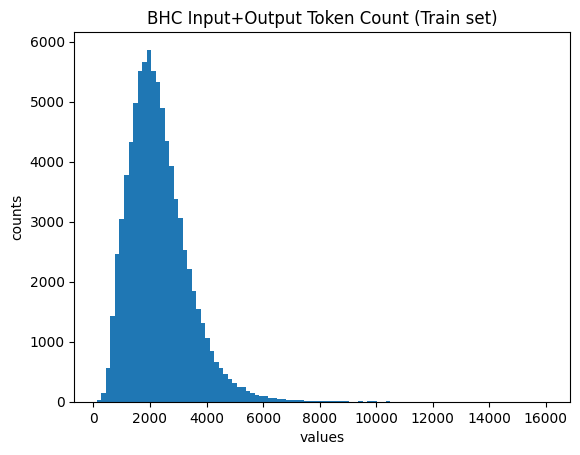

In [16]:
plot_token_count(new_train_combined_discharge['bhc_token_count'] + new_train_combined_discharge['input_of_bhc_token_count'] , 'BHC Input+Output Token Count (Train set)')

**Stage3 cleaning of specific token groups**
- Replacing 2 or more `__` by only one `_`
- Replacing at least 2 `======` by `\n`

In [20]:
new_train_combined_discharge['input_of_bhc'] = new_train_combined_discharge['input_of_bhc'].progress_apply(remove_unecessary_tokens)

100%|██████████| 83504/83504 [00:53<00:00, 1561.41it/s]


In [21]:
new_train_combined_discharge['input_of_bhc_token_count'] = new_train_combined_discharge['input_of_bhc'].progress_apply(get_token_count)

100%|██████████| 83504/83504 [03:40<00:00, 378.32it/s]


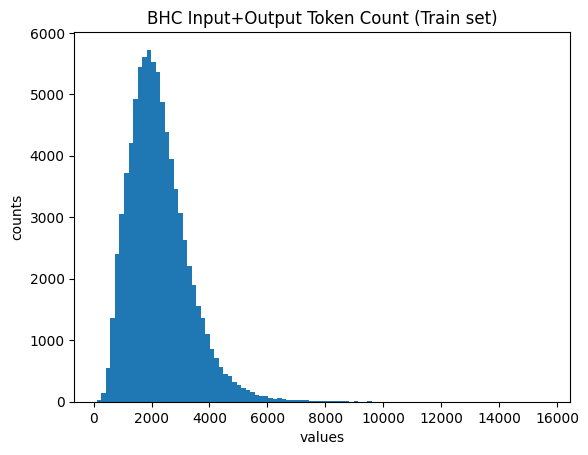

In [22]:
plot_token_count(new_train_combined_discharge['bhc_token_count'] + new_train_combined_discharge['input_of_bhc_token_count'] , 'BHC Input+Output Token Count (Train set)')

In [24]:
# coumpute the percentage of the samples that its input_of_bhc_token_count+bhc_token_count is more than 4096
print(len(new_train_combined_discharge[new_train_combined_discharge['bhc_token_count'] + new_train_combined_discharge['input_of_bhc_token_count'] > 4096]) / len(new_train_combined_discharge))

0.05342259053458517


**Stage4 adding the prompt to the input**

### Construct the Discharge_instruction dataset

**Stage1: First cleaning by meaningful extraction**
i.e. keep and organize relevent sections without looking to much in details

In [25]:
clean1_di_input = extract_clean_inputs(new_train_combined_discharge,
                        features_to_include=[
                                'medication_on_admission',
                                'discharge_medications',
                                'discharge_disposition',
                                'discharge_diagnosis',
                                'discharge_condition',
                            ])

100%|██████████| 83504/83504 [00:05<00:00, 15451.18it/s]


In [33]:
print(clean1_di_input[7])

Medications on Admission: 
The Preadmission Medication list may be inaccurate and requires 
futher investigation.
1. Allopurinol ___ mg PO EVERY OTHER DAY 
2. Aspirin 81 mg PO DAILY 
3. Atorvastatin 80 mg PO QPM 
4. Carvedilol 12.5 mg PO BID 
5. Lisinopril 40 mg PO DAILY 
6. Multivitamins 1 TAB PO DAILY 
7. NIFEdipine CR 30 mg PO BID 
8. Vitamin D ___ UNIT PO DAILY 
9. Docusate Sodium 100 mg PO BID 
10. Gabapentin 100 mg PO QHS neuropathic pain 
11. Pantoprazole 40 mg PO Q12H 
12. Senna 8.6 mg PO BID constipation 
13. Warfarin 4 mg PO 3X/WEEK (___) 
14. Nitroglycerin SL 0.3 mg SL Q5MIN:PRN chest pain 
15. Furosemide 20 mg PO DAILY 
16. Polyethylene Glycol 17 g PO DAILY 
17. Acetaminophen 325-650 mg PO Q6H:PRN pain or fever 
18. Warfarin 3 mg PO 4X/WEEK (___) 
19. 70/30 30 Units Dinner

 
Discharge Medications: 
1. Acetaminophen 325-650 mg PO Q6H:PRN pain or fever 
RX *acetaminophen 325 mg ___ tablet(s) by mouth Q6H:PRN Disp 
#*120 Tablet Refills:*0
2. Aspirin 81 mg PO DAILY 
RX *aspiri

In [34]:
print(new_train_combined_discharge['discharge_instructions'][7])

Dear ___,

It was a pleasure caring for you. You were admitted to the 
hospital with fatigue, chest pain, and shortness of breath. You 
were found to have too few red blood cells (anemia). We gave you 
blood, and your symptoms improved. Additionally, you were found 
to have too much fluid in your legs and lungs. We treated you 
with a diuretic, which helped eliminate the fluid. 

Weigh yourself every morning, call MD if weight goes up more 
than 3 lbs.

Sincerely,
Your ___ Team


In [79]:
new_train_combined_discharge['input_of_di'] = "Brief Hospital Course:\n" + new_train_combined_discharge['brief_hospital_course'] + "\n\n" + clean1_di_input

In [80]:
new_train_combined_discharge.head()

,hadm_id,text,discharge_instructions,brief_hospital_course,input_of_bhc,bhc_token_count,di_token_count,input_of_bhc_token_count,input_of_di,input_of_di_token_count
0,22841357,\nName: ___ Unit No: _...,"Dear ___,\n\n___ was a pleasure to take care o...","___ with HIV on HAART, HCV cirrhosis with asci...",sex: \nF\n \nallergies: \npercocet\n \nchief c...,1123,220,1171,"Brief Hospital Course:\n___ with HIV on HAART,...",1708
1,22927623,\nName: ___ Unit No: ___\n...,"Dear Ms. ___,\n\nYou were hospitalized at ___....",Ms. ___ is a ___ with history of GERD who pres...,sex: \nF\n \nallergies: \nomeprazole\n \nchief...,133,112,908,Brief Hospital Course:\nMs. ___ is a ___ with ...,318
2,21738619,\nName: ___ Unit No: ___...,"Dear ___, \n\n___ were seen in the ED for ongo...",___ Female with PMH significant for depression...,sex: \nF\n \nallergies: \nsulfa (sulfonamide a...,550,177,1830,Brief Hospital Course:\n___ Female with PMH si...,1203
3,25849114,\nName: ___ Unit No: ___...,"Dear Ms. ___,\nIt was a pleasure taking part i...",Ms. ___ is a ___ with metastatic cancer of unk...,sex: \nF\n \nallergies: \nsulfa (sulfonamide a...,112,260,1698,Brief Hospital Course:\nMs. ___ is a ___ with ...,853
4,29654838,\nName: ___ Unit No: ___\n \nAdmi...,"Dear Ms. ___, \n\nYou were admitted for shortn...","___ woman with h/o hypertension, hypelipidemia...",sex: \nF\n \nallergies: \nno known allergies /...,934,333,1527,Brief Hospital Course:\n___ woman with h/o hyp...,2314


In [82]:
print(new_train_combined_discharge['input_of_di'][4])

Brief Hospital Course:
___ woman with h/o hypertension, hypelipidemia, diabetes 
mellitus on insulin, cerebellar-medullary stroke in ___, 
stage ___ CKD followed by Dr ___ presenting with fatigue and 
DOE for a few weeks, markedly worse the morning of admission. 
The patient has known diastolic dysfunction. Of note, she has 
been noncompliant with her medications at home. On arrival to 
the floor, she required hydralazine 20 mg to bring down her BP. 
She has likely had elevated BPs at home for a while, which is 
contributing to her SOB, CHF exacerbation, and secondary demand 
myonecrosis (hypertensive urgency) with mildly elevated 
troponin.

# CAD: Although she did not have a classic anginal presentation, 
patient has several risk factors for acute coronary syndrome. 
Her only symptom was SOB in the setting of elevated BPs 
attributed to medication noncompliance at home. Her troponin 
fell from 0.05 at admission to 0.01 at discharge in the setting 
of renal dysfunction, but there was 

In [43]:
new_train_combined_discharge['input_of_di_token_count'] = new_train_combined_discharge['input_of_di'].progress_apply(get_token_count)

100%|██████████| 83504/83504 [03:30<00:00, 396.02it/s]


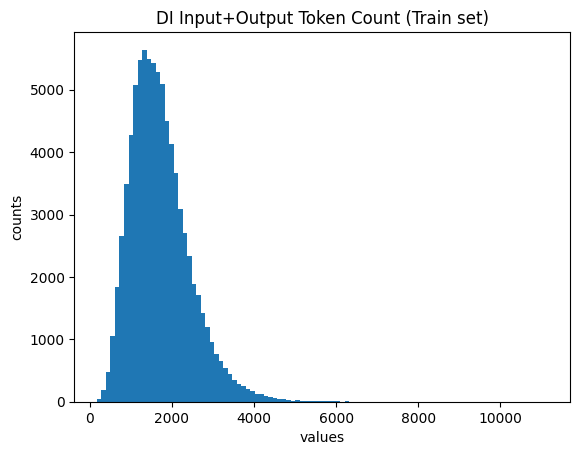

In [44]:
plot_token_count(new_train_combined_discharge['di_token_count'] + new_train_combined_discharge['input_of_di_token_count'] , 'DI Input+Output Token Count (Train set)')

In [45]:
print(len(new_train_combined_discharge[new_train_combined_discharge['di_token_count'] + new_train_combined_discharge['input_of_di_token_count'] > 4096]) / len(new_train_combined_discharge))

0.00753257328990228


In [83]:
# exchange the columns of the dataframe
final_train_combined_discharge = new_train_combined_discharge[['hadm_id', 'text', 'discharge_instructions', 'brief_hospital_course', 'input_of_bhc', 'input_of_di', 'bhc_token_count', 'di_token_count', 'input_of_bhc_token_count', 'input_of_di_token_count']]

In [84]:
final_train_combined_discharge.head()

,hadm_id,text,discharge_instructions,brief_hospital_course,input_of_bhc,input_of_di,bhc_token_count,di_token_count,input_of_bhc_token_count,input_of_di_token_count
0,22841357,\nName: ___ Unit No: _...,"Dear ___,\n\n___ was a pleasure to take care o...","___ with HIV on HAART, HCV cirrhosis with asci...",sex: \nF\n \nallergies: \npercocet\n \nchief c...,"Brief Hospital Course:\n___ with HIV on HAART,...",1123,220,1171,1708
1,22927623,\nName: ___ Unit No: ___\n...,"Dear Ms. ___,\n\nYou were hospitalized at ___....",Ms. ___ is a ___ with history of GERD who pres...,sex: \nF\n \nallergies: \nomeprazole\n \nchief...,Brief Hospital Course:\nMs. ___ is a ___ with ...,133,112,908,318
2,21738619,\nName: ___ Unit No: ___...,"Dear ___, \n\n___ were seen in the ED for ongo...",___ Female with PMH significant for depression...,sex: \nF\n \nallergies: \nsulfa (sulfonamide a...,Brief Hospital Course:\n___ Female with PMH si...,550,177,1830,1203
3,25849114,\nName: ___ Unit No: ___...,"Dear Ms. ___,\nIt was a pleasure taking part i...",Ms. ___ is a ___ with metastatic cancer of unk...,sex: \nF\n \nallergies: \nsulfa (sulfonamide a...,Brief Hospital Course:\nMs. ___ is a ___ with ...,112,260,1698,853
4,29654838,\nName: ___ Unit No: ___\n \nAdmi...,"Dear Ms. ___, \n\nYou were admitted for shortn...","___ woman with h/o hypertension, hypelipidemia...",sex: \nF\n \nallergies: \nno known allergies /...,Brief Hospital Course:\n___ woman with h/o hyp...,934,333,1527,2314


In [85]:
print(final_train_combined_discharge['brief_hospital_course'][4])

___ woman with h/o hypertension, hypelipidemia, diabetes 
mellitus on insulin, cerebellar-medullary stroke in ___, 
stage ___ CKD followed by Dr ___ presenting with fatigue and 
DOE for a few weeks, markedly worse the morning of admission. 
The patient has known diastolic dysfunction. Of note, she has 
been noncompliant with her medications at home. On arrival to 
the floor, she required hydralazine 20 mg to bring down her BP. 
She has likely had elevated BPs at home for a while, which is 
contributing to her SOB, CHF exacerbation, and secondary demand 
myonecrosis (hypertensive urgency) with mildly elevated 
troponin.

# CAD: Although she did not have a classic anginal presentation, 
patient has several risk factors for acute coronary syndrome. 
Her only symptom was SOB in the setting of elevated BPs 
attributed to medication noncompliance at home. Her troponin 
fell from 0.05 at admission to 0.01 at discharge in the setting 
of renal dysfunction, but there was not a clear rise and fa

In [87]:
print(final_train_combined_discharge['input_of_di'][4])

Brief Hospital Course:
___ woman with h/o hypertension, hypelipidemia, diabetes 
mellitus on insulin, cerebellar-medullary stroke in ___, 
stage ___ CKD followed by Dr ___ presenting with fatigue and 
DOE for a few weeks, markedly worse the morning of admission. 
The patient has known diastolic dysfunction. Of note, she has 
been noncompliant with her medications at home. On arrival to 
the floor, she required hydralazine 20 mg to bring down her BP. 
She has likely had elevated BPs at home for a while, which is 
contributing to her SOB, CHF exacerbation, and secondary demand 
myonecrosis (hypertensive urgency) with mildly elevated 
troponin.

# CAD: Although she did not have a classic anginal presentation, 
patient has several risk factors for acute coronary syndrome. 
Her only symptom was SOB in the setting of elevated BPs 
attributed to medication noncompliance at home. Her troponin 
fell from 0.05 at admission to 0.01 at discharge in the setting 
of renal dysfunction, but there was 

In [66]:
print(final_train_combined_discharge['discharge_instructions'][4])

Dear Ms. ___, 

You were admitted for shortness of breath. You were found to 
have elevated blood pressure on admission in the setting of not 
taking all of your medications regularly. We obtained an 
echocargiogram of your heart which showed some strain on your 
heart possibly related to your elevated blood pressures.

You will be contacted about an outpatient stress test. This will 
be completed within the next month.

You will be prescribed several new medications as shown below. A 
visiting nurse ___ come to your home to help with managing your 
medications. You should dispose of all your home medications and 
only take the medications shown on this discharge paperwork.

Medications:
STOP Hydrochlorothiazide
STOP Simvastatin
STOP Clonidine
STOP Atenolol due to low heart rate
CHANGE 325mg to 81mg once daily
START Lisinopril 20mg once daily
START Lasix 40mg once daily
START Pravastin 80mg once daily

If you experience any chest pain, excessive shortness of breath, 
or any other sympt

In [88]:
# save the final_train_combined_discharge
save_data(final_train_combined_discharge, data_path + 'train/final_train_combined_discharge.csv.gz')